In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [10]:
col_name = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fM3Alpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=col_name)

In [11]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fM3Alpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [12]:
df.shape


(19020, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fM3Alpha  19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [14]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fM3Alpha    0
fDist       0
class       0
dtype: int64

In [15]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fM3Alpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [18]:
df['class'] = [1 if value == 'g' else 0 for value in df['class']]

In [21]:
df['class'] = df['class'].astype('int', copy=False)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fM3Alpha  19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


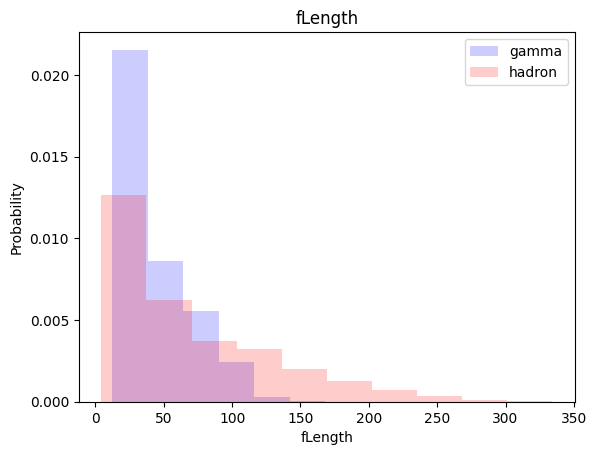

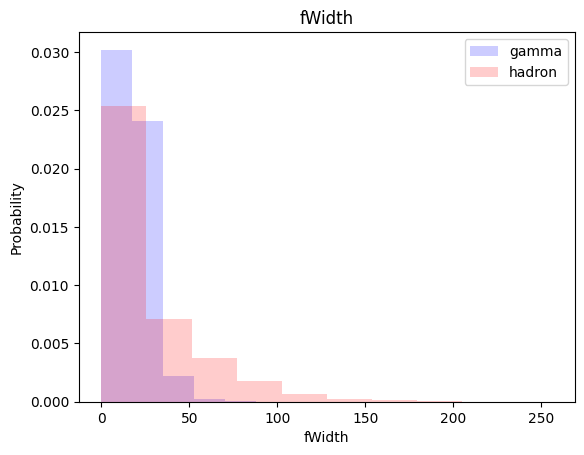

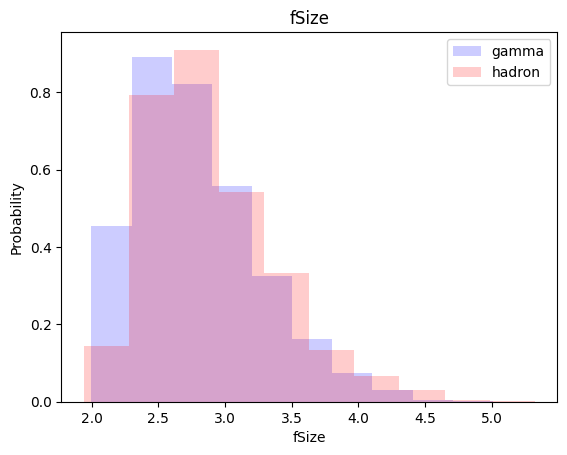

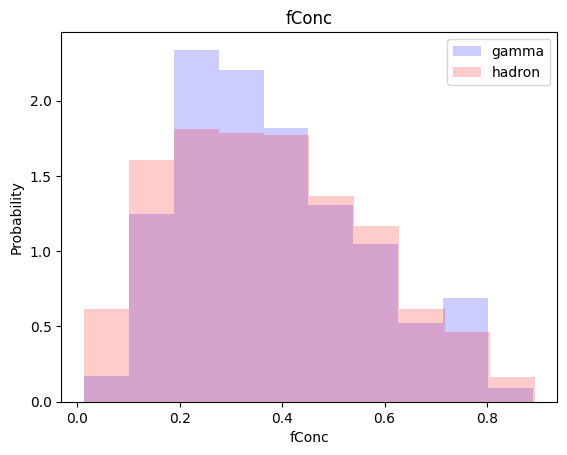

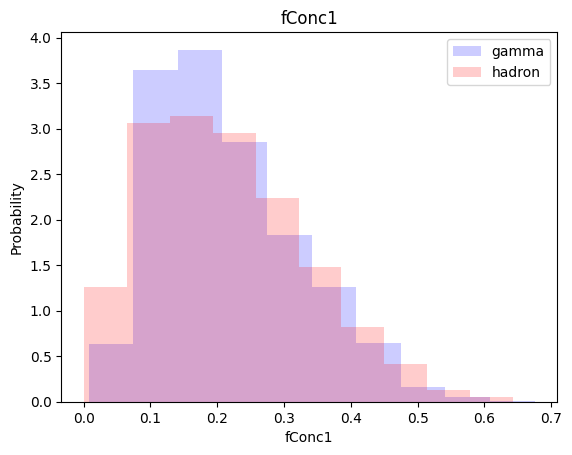

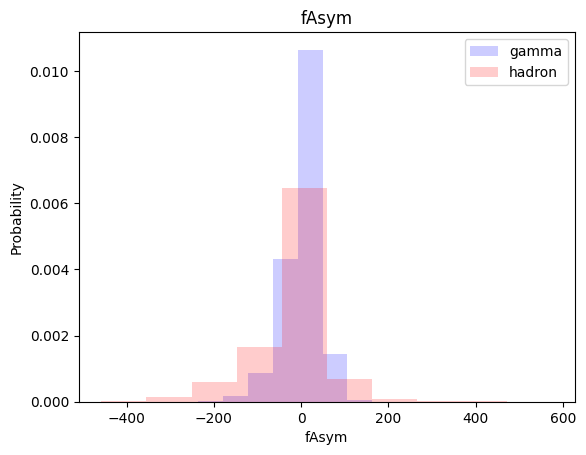

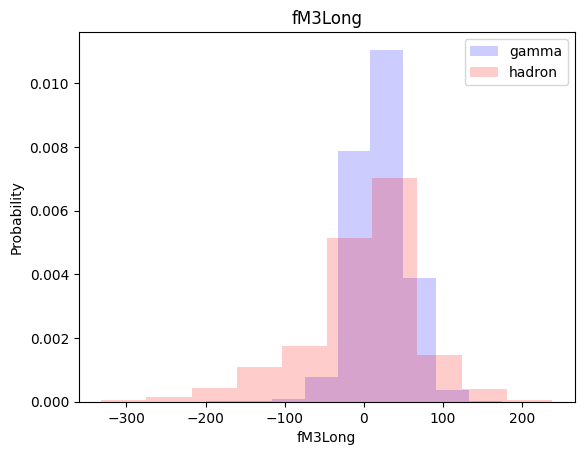

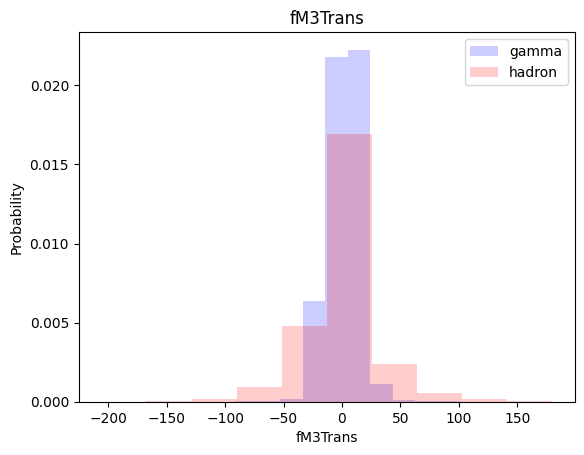

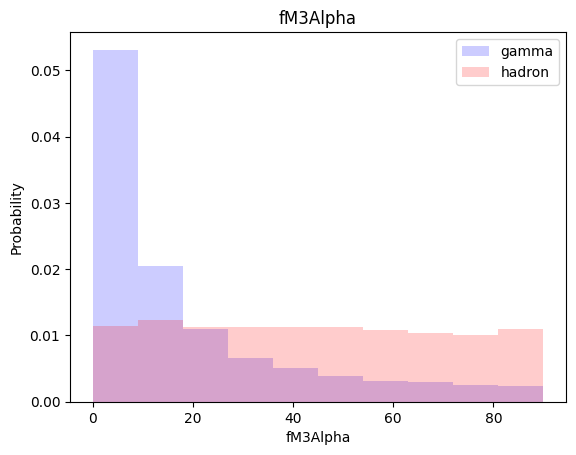

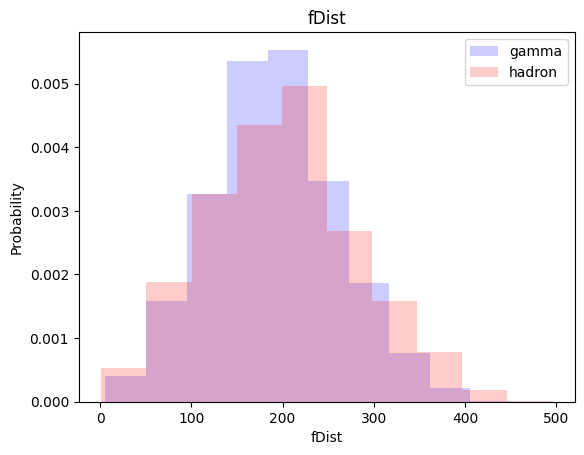

In [38]:
for label in df.columns[:-1]:
    plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.2, density=True)
    plt.hist(df[df['class'] == 0][label], color='red', label='hadron', alpha=0.2, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

**Train, Validation, and Test Datasets**

In [70]:
train, temp = train_test_split(df, test_size=0.3, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=42)


**Scale Dataset**

In [63]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[df.columns[:-1]].values
    y = dataframe[df.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [71]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

**BUILD, TRAIN, AND TEST MODEL**

**K-nearest Neighbor (KNN)**

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [74]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
y_pred = knn_model.predict(X_test)


In [79]:
print(accuracy_score(y_test, y_pred))

0.810024535576586


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1007
           1       0.86      0.85      0.85      1846

    accuracy                           0.81      2853
   macro avg       0.79      0.79      0.79      2853
weighted avg       0.81      0.81      0.81      2853



**Naive Bayes**

In [89]:
from sklearn.naive_bayes import GaussianNB

In [101]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [102]:
test_pred = nb_model.predict(X_test)
train_pred = nb_model.predict(X_train)

In [103]:
# train accuracy
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")

# test accuracy
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.65
Test Accuracy: 0.73


In [104]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.72      0.38      0.50      1007
           1       0.73      0.92      0.82      1846

    accuracy                           0.73      2853
   macro avg       0.73      0.65      0.66      2853
weighted avg       0.73      0.73      0.70      2853



**Logistic Regression**

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [108]:
y_pred = lg_model.predict(X_test)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1007
           1       0.85      0.84      0.84      1846

    accuracy                           0.80      2853
   macro avg       0.78      0.78      0.78      2853
weighted avg       0.80      0.80      0.80      2853



**Support Vector Machine (SVM)**

In [111]:
from sklearn.svm import SVC

In [113]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [115]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1007
           1       0.90      0.90      0.90      1846

    accuracy                           0.87      2853
   macro avg       0.86      0.86      0.86      2853
weighted avg       0.87      0.87      0.87      2853

